In [2]:
import scanpy as sc
import Topyfic
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')

In [ ]:
data = sc.read_h5ad("../data/all_ModelAD_ENCODE_final_rep2.h5ad")

In [ ]:
top_model = Topyfic.read_topModel(f"../../Training/sn_allgenes_5xFAD_control_combine/15/topModel_sn_ModelAD_ENCODE_allGenes.p")

## analysis

In [5]:
analysis_top_model = Topyfic.Analysis(Top_model=top_model)
analysis_top_model.calculate_cell_participation(data=data)
analysis_top_model.save_analysis()

Reading TopModel done!
Saving analysis class as analysis_sn_ModelAD_ENCODE_allGenes.p


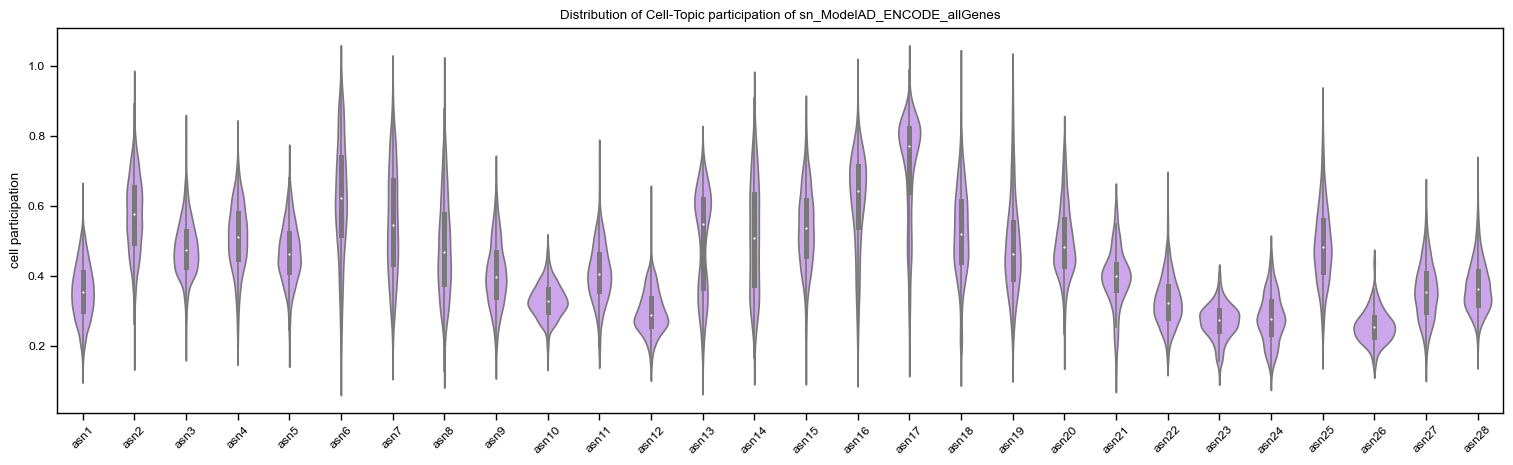

In [8]:
label = dict()
for i in range(analysis_top_model.top_model.N):
    key = f"Topic_{i+1}"
    value = f"asn{i+1}"
    label[key] = value

analysis_top_model.cell_participation_distribution(plot_type="violin",
                                         threshold=0.05,
                                         max_topic=True,
                                         label=label,
                                         color="#CF99F7",
                                         save=True,
                                         show=True,
                                         file_format="pdf",
                                         file_name="figures/sn_allGenes_dist_cell_participation")

,5xFAD/BL6,5xFAD/CAST,BL6,BL6/CAST
Topic_17,53.187643,67.517755,21.190246,23.759924
Topic_4,15.965777,13.225488,34.620375,53.124075
Topic_26,6.16884,7.407651,5.733687,9.392359
Topic_1,4.742301,4.750241,5.626822,5.927103
Topic_2,0.505828,0.09385,1.07769,0.031396
Topic_3,2.414685,0.123178,4.865018,0.13122
Topic_5,0.16471,0.066585,0.326466,0.035482
Topic_6,0.331425,0.087711,0.672963,0.269363
Topic_7,0.621673,0.36018,1.818551,0.313527
Topic_8,0.543492,0.231592,1.425853,0.255645


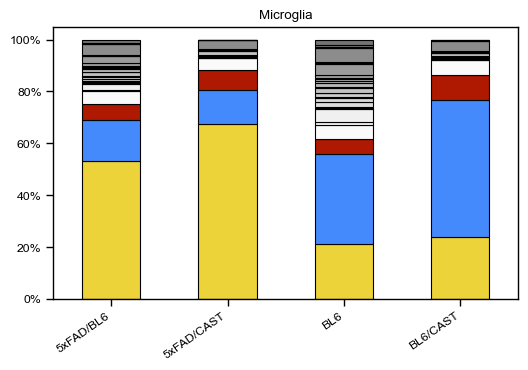

In [11]:
analysis_top_model = Topyfic.read_analysis(f"analysis_sn_ModelAD_ENCODE_allGenes.p")
cell_participation = analysis_top_model.cell_participation
cell_participation = cell_participation[cell_participation.obs.celltypes == "Microglia"]

category = cell_participation.obs.species.unique().tolist()

df_plot = pd.DataFrame(index=cell_participation.var.index.tolist(),
                       columns=category)

for i in range(len(category)):
    tissue = cell_participation.obs[cell_participation.obs.species == category[i]]
    tmp = cell_participation.to_df().loc[tissue.index, :]
    order = tmp.mean().sort_values(ascending=False).index.tolist()
    index = tmp[order].sort_values(by=order, ascending=False).index.tolist()
    tmp = tmp.reindex(columns=order)
    tmp = tmp.reindex(index)
    tmp = tmp.mean()
    df_plot.loc[tmp.index, category[i]] = tmp.values

topic_order = [
 'Topic_17',
 'Topic_4',
 'Topic_26',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'Topic_12',
 'Topic_13',
 'Topic_14',
 'Topic_15',
 'Topic_16',
 'Topic_18',
 'Topic_19',
 'Topic_20',
 'Topic_21',
 'Topic_22',
 'Topic_23',
 'Topic_24',
 'Topic_25',
 'Topic_27',
 'Topic_28']
df_plot = df_plot.reindex(topic_order)
df_plot = df_plot * 100
df_plot = df_plot[['5xFADHEMI', '5xFAD/CAST', '5xFADWT', 'BL6/CAST']]
df_plot.columns = ['5xFAD/BL6', '5xFAD/CAST', 'BL6', 'BL6/CAST']

colors = sns.color_palette("gray", 50).as_hex()
j = 49
for i in range(analysis_top_model.colors_topics.shape[0]):
    analysis_top_model.colors_topics.colors[i] = colors[j]
    j = j - 1
analysis_top_model.colors_topics.colors["Topic_4"] = '#458afc'
analysis_top_model.colors_topics.colors["Topic_17"] = "#ebd339"
analysis_top_model.colors_topics.colors["Topic_26"] = "#af1801"
color = analysis_top_model.colors_topics.colors
color = color.reindex(topic_order)

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')

df_plot.T.plot(kind='bar', 
               stacked=True, 
               color=color,
               edgecolor="Black",
               legend=False,
               ax=ax)

ax.set_ylim(0, 105)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax.set_title("Microglia")
#plt.xticks(rotation=35, ha='right')
fig.autofmt_xdate(rotation=35)

fig.savefig("figures/fig2c.pdf")
df_plot

In [1]:
my_palette_timepoint = {'PNM_08': 'purple',}

my_palette_sex = {'Female': 'pink',
                  'Male': 'royalblue'}

my_palette_tissue = {'Cortex': 'chocolate',
                     'Hippocampus': 'orchid'}
my_palette_tissue = {'Cortex': '#0000B9', 
                     'Hippocampus': '#027148'}

my_palette_species = {'5xFADHEMI': 'orange',
                      '5xFADWT': 'lime',
                      '5xFAD/CAST': 'violet',
                      'BL6/CAST': 'cyan', }

my_palette_strain = {'5xFAD/B6CAST': 'hotpink',
                      '5xFAD/BL6': 'darkorchid'}

my_palette_transgene = {'5xFAD': 'orangered',
                        'WT': 'royalblue'}

my_palette = {'species': my_palette_species,
              'tissue' : my_palette_tissue,
              'Strain': my_palette_strain,
              'sex': my_palette_sex,
              'Transgene': my_palette_transgene}

In [17]:
analysis_top_model.cell_participation.obs.species = analysis_top_model.cell_participation.obs.species.cat.reorder_categories(['5xFADHEMI', '5xFAD/CAST', '5xFADWT', 'BL6/CAST'], ordered=True)
df = analysis_top_model.cell_participation.obs.copy(deep=True)
df.sort_values(by=["species", "sex", "tissue"], ascending=True)[["species", "sex", "tissue"]]

groups = df[["species", "sex", "tissue"]].value_counts(sort=False).reset_index()
groups            

,species,sex,tissue,count
0,5xFADHEMI,Female,Cortex,4087
1,5xFADHEMI,Female,Hippocampus,2866
2,5xFADHEMI,Male,Cortex,4288
3,5xFADHEMI,Male,Hippocampus,3140
4,5xFAD/CAST,Female,Cortex,2657
5,5xFAD/CAST,Female,Hippocampus,4060
6,5xFAD/CAST,Male,Cortex,3069
7,5xFAD/CAST,Male,Hippocampus,3442
8,5xFADWT,Female,Cortex,7943
9,5xFADWT,Female,Hippocampus,3633


In [14]:
analysis_top_model.cell_participation.obs.species = analysis_top_model.cell_participation.obs.species.cat.reorder_categories(['5xFADHEMI', '5xFAD/CAST', '5xFADWT', 'BL6/CAST'], ordered=True)
df = analysis_top_model.cell_participation.obs.copy(deep=True)
df.sort_values(by=["species", "sex", "tissue"], ascending=True)[["species", "sex", "tissue"]]

df['count'] = 1
df = df.astype(object)
groups = df.groupby(["species", "sex", "tissue"]).sum().reset_index()[["species", "sex", "tissue", 'count']]
groups.sort_values(by=["species", "sex", "tissue"], ascending=True, inplace=True)
groups            

,species,sex,tissue,count
0,5xFAD/CAST,Female,Cortex,2657
1,5xFAD/CAST,Female,Hippocampus,4060
2,5xFAD/CAST,Male,Cortex,3069
3,5xFAD/CAST,Male,Hippocampus,3442
4,5xFADHEMI,Female,Cortex,4087
5,5xFADHEMI,Female,Hippocampus,2866
6,5xFADHEMI,Male,Cortex,4288
7,5xFADHEMI,Male,Hippocampus,3140
8,5xFADWT,Female,Cortex,7943
9,5xFADWT,Female,Hippocampus,3633


Reading Analysis done!


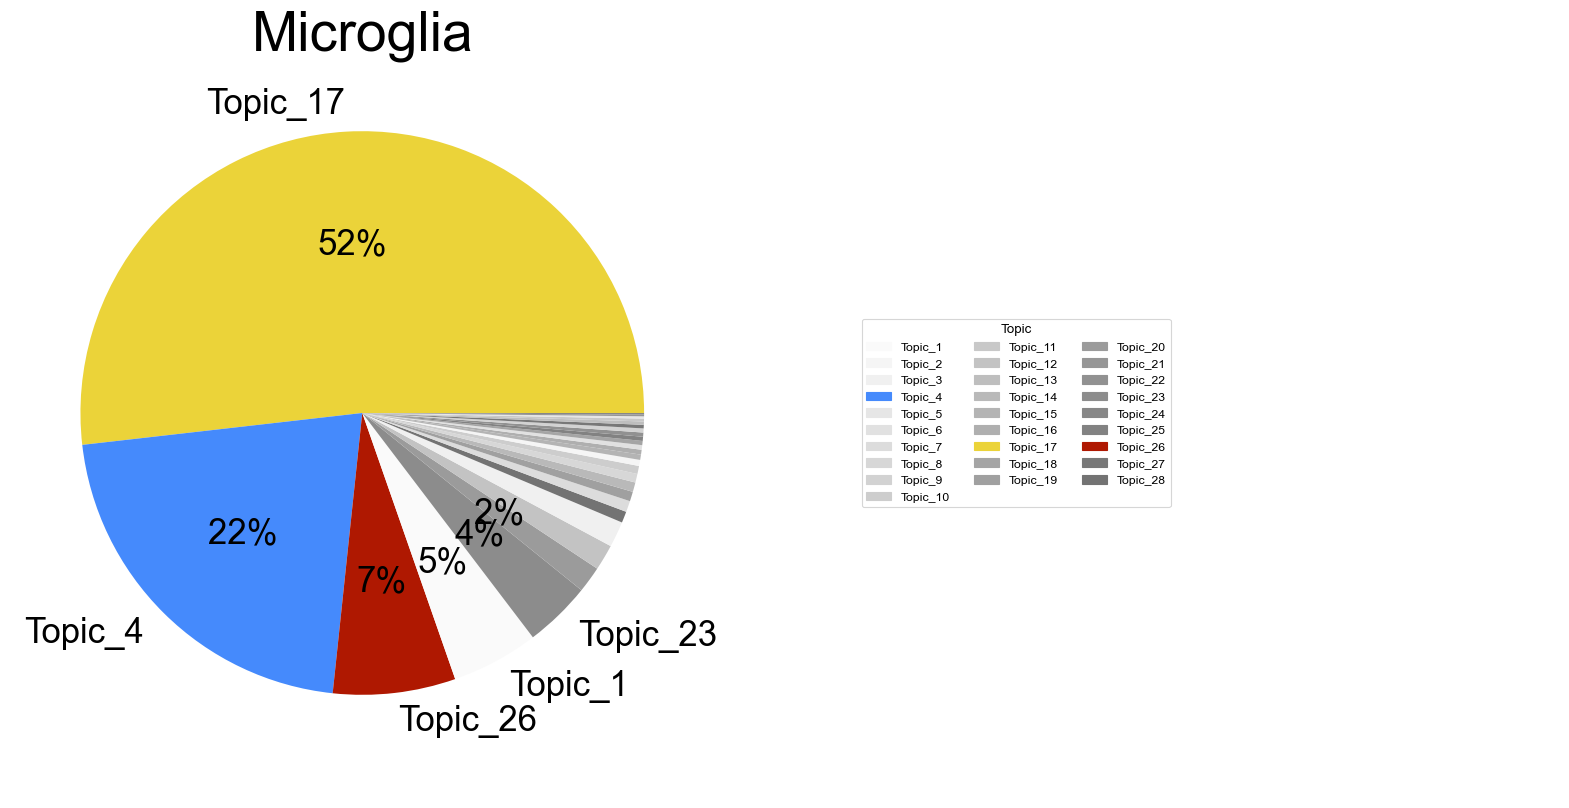

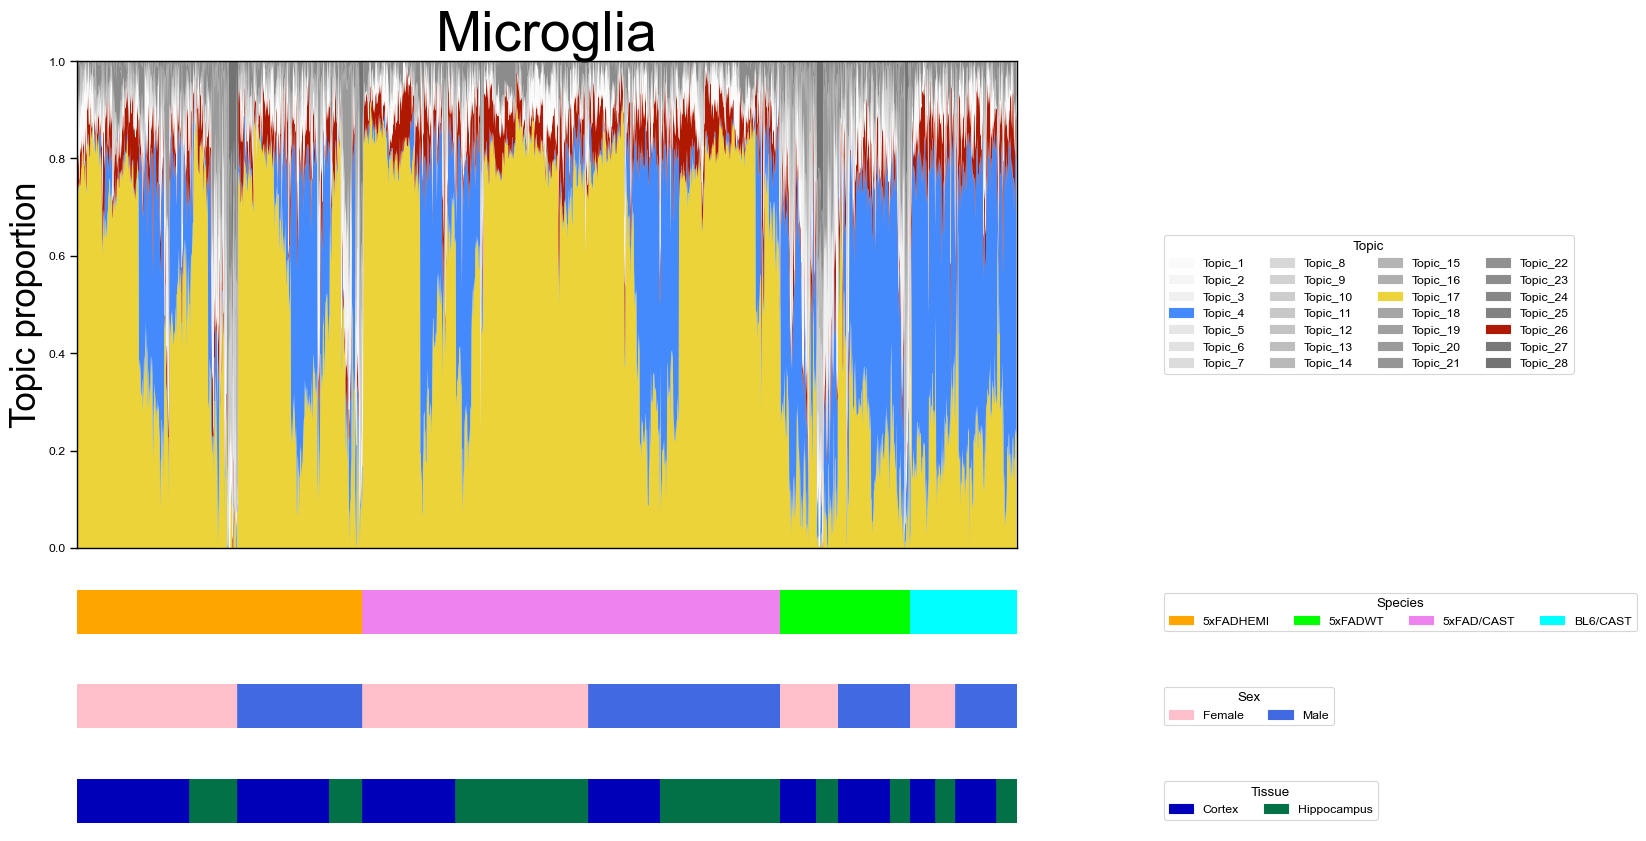

In [2]:
analysis_top_model = Topyfic.read_analysis(f"analysis_sn_ModelAD_ENCODE_allGenes.p")
analysis_top_model.cell_participation.obs.species = analysis_top_model.cell_participation.obs.species.cat.reorder_categories(['5xFADHEMI', '5xFAD/CAST', '5xFADWT', 'BL6/CAST'], ordered=True)

colors = sns.color_palette("gray", 50).as_hex()
j = 49
for i in range(analysis_top_model.colors_topics.shape[0]):
    analysis_top_model.colors_topics.colors[i] = colors[j]
    j = j - 1
analysis_top_model.colors_topics.colors["Topic_4"] = '#458afc'
analysis_top_model.colors_topics.colors["Topic_17"] = "#ebd339"
analysis_top_model.colors_topics.colors["Topic_26"] = "#af1801"

topic_order = [
 'Topic_17',
 'Topic_4',
 'Topic_26',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'Topic_12',
 'Topic_13',
 'Topic_14',
 'Topic_15',
 'Topic_16',
 'Topic_18',
 'Topic_19',
 'Topic_20',
 'Topic_21',
 'Topic_22',
 'Topic_23',
 'Topic_24',
 'Topic_25',
 'Topic_27',
 'Topic_28']
celltype = "Microglia"
subtypes = analysis_top_model.cell_participation.obs[analysis_top_model.cell_participation.obs.celltypes == celltype].subtypes.unique().tolist()

file_name = f"figures/pieChart/dist_topics_celltypes_RNA_{celltype}"
analysis_top_model.pie_structure_Chart(level='subtypes',
                                           category=subtypes,
                                            save=True,
                                            show=True,
                                           file_format='pdf',
                                            file_name=file_name)

file_name = f"figures/structurePlot/dist_topics_celltypes_RNA_timepoint_{celltype}"
analysis_top_model.structure_plot(level='subtypes',
                                    category=subtypes, 
                                  topic_order=topic_order,
                                      metaData=['species', "sex", "tissue"],
                                      metaData_palette=my_palette,
                                      order_cells=["species", "sex", "tissue", "hierarchy"],
                                      save=True,
                                      show=True,
                                      file_format='pdf',
                                      file_name=file_name)

                                              Strain  Transgene Astrocyte  \
cellID                                                                      
AGCAGGAAAAACATCG_37.12A.B_C_28-0                   0          0         0   
CACTTCGAAAACATCG_37.12A.B_C_28-0                   0          0         0   
CCAGTTCAAAACATCG_37.12A.B_C_28-0                   0          0         0   
CCTCCTGAAAACATCG_37.12A.B_C_28-0                   0          0         0   
CTGTAGCCAAACATCG_37.12A.B_C_28-0                   0          0         0   
...                                              ...        ...       ...   
ACATTGGCTTCACGCA_40.12F.snH_5xFADWT_8m_M_2-1       1          0         0   
AGCAGGAATTCACGCA_40.12F.snH_5xFADWT_8m_M_2-1       1          0         0   
CAGCGTTATTCACGCA_40.12F.snH_5xFADWT_8m_M_2-1       1          0         1   
CCGTGAGATTCACGCA_40.12F.snH_5xFADWT_8m_M_2-1       1          0         0   
TGGCTTCATTCACGCA_40.12F.snH_5xFADWT_8m_M_2-1       1          0         0   

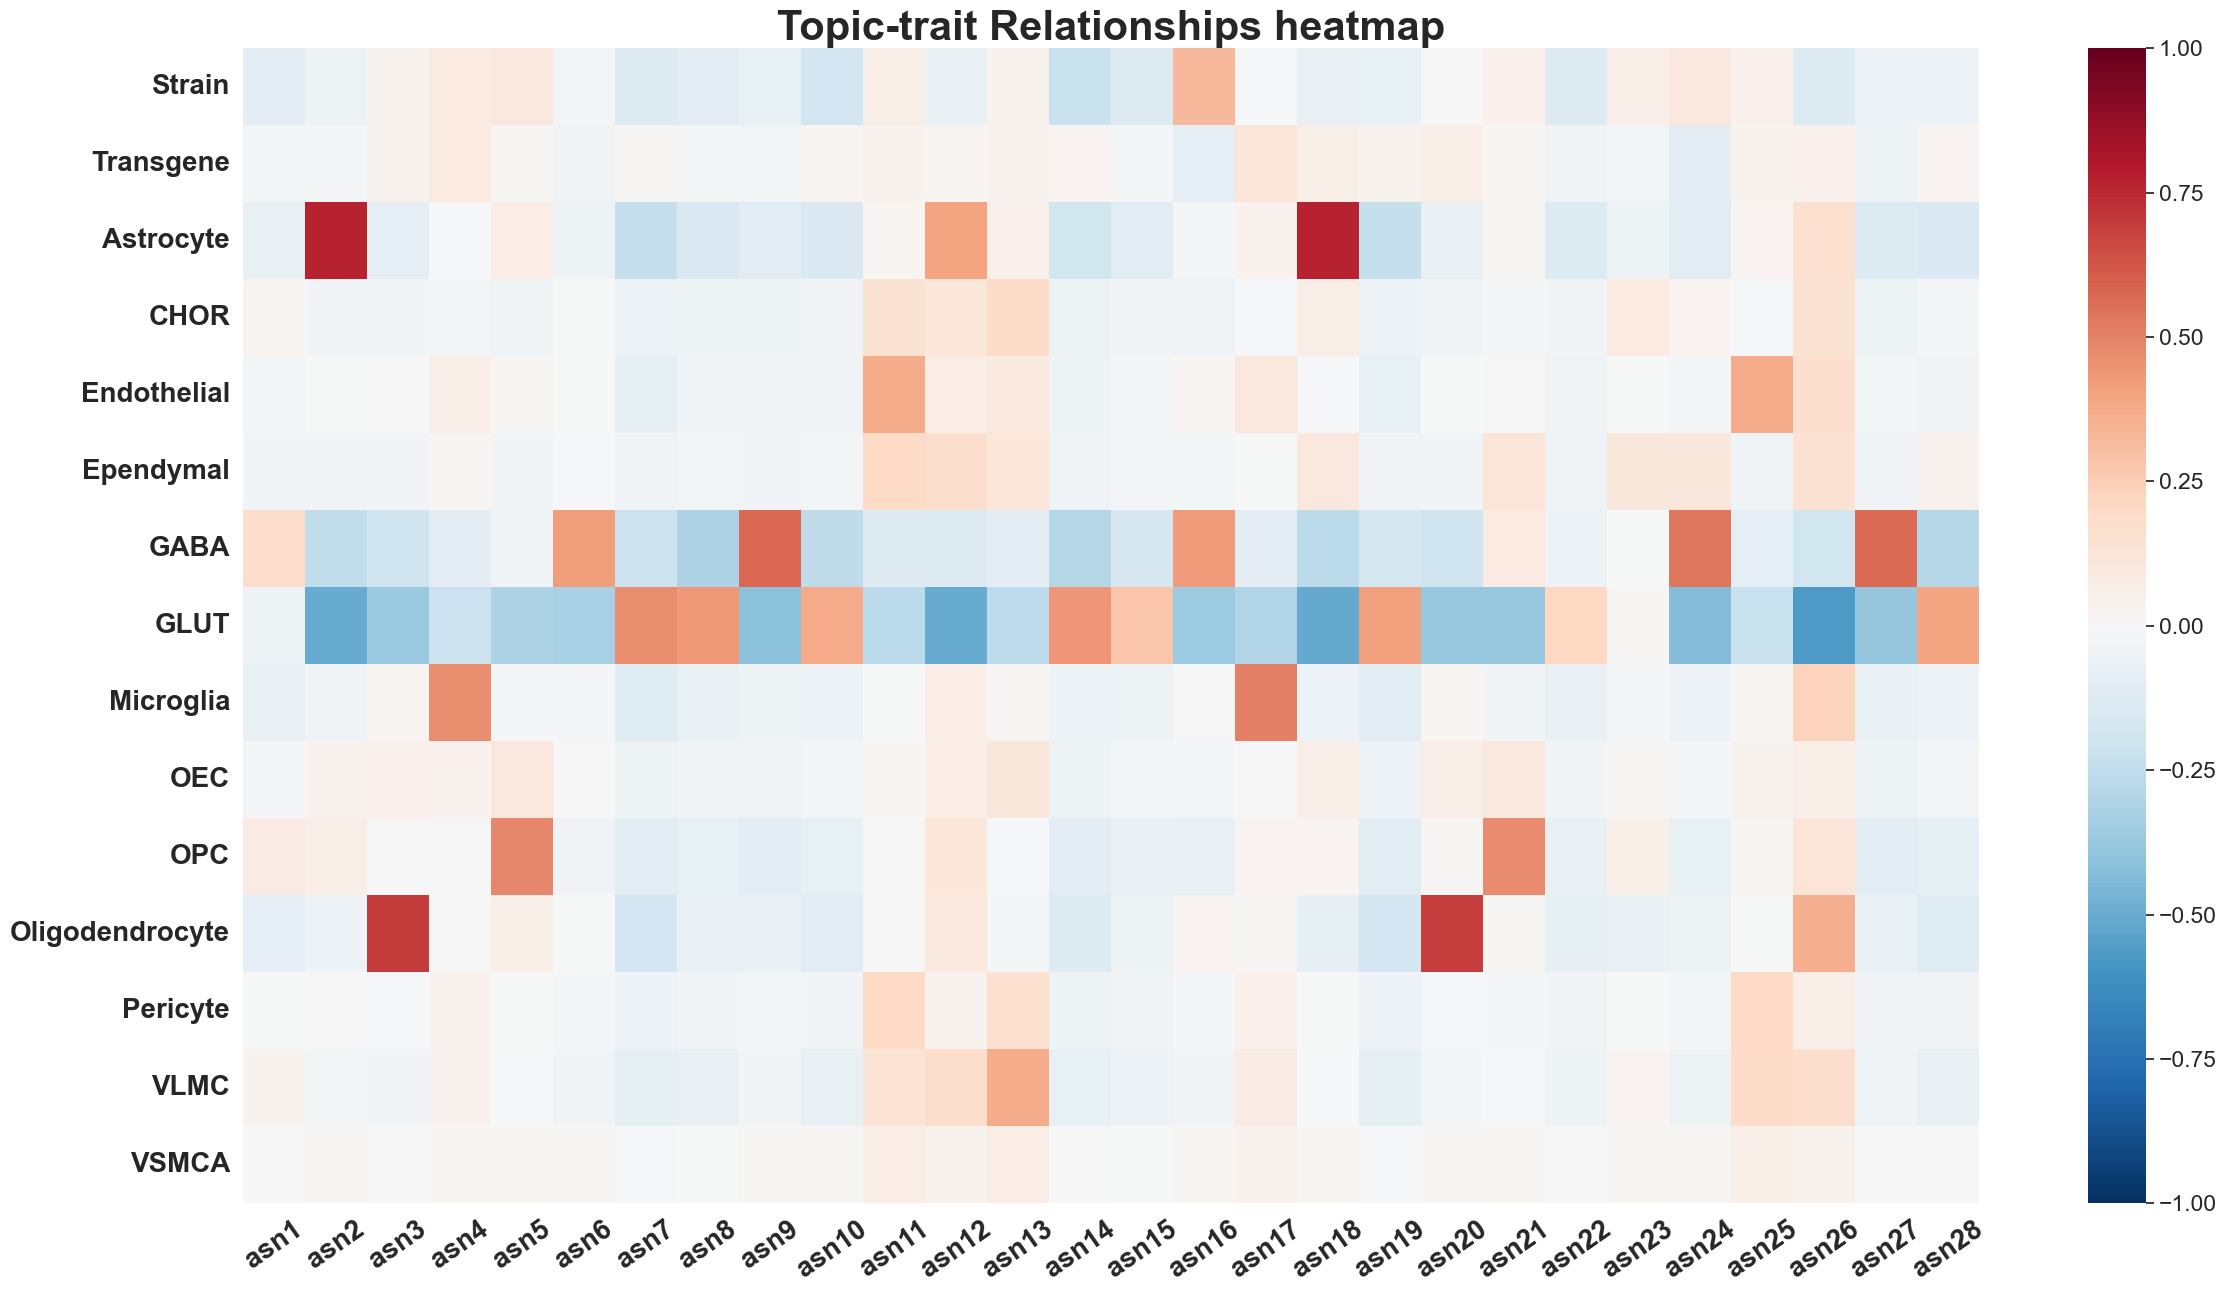

In [11]:
metadata = metadata = ["Strain", "Transgene", "celltypes"]
analysis_top_model.TopicTraitRelationshipHeatmap(metadata,
                                                 save=True,
                                                 show=False,
                                                 file_format='png',
                                                 file_name='figures/topic-traitRelationships')

Reading TopModel done!


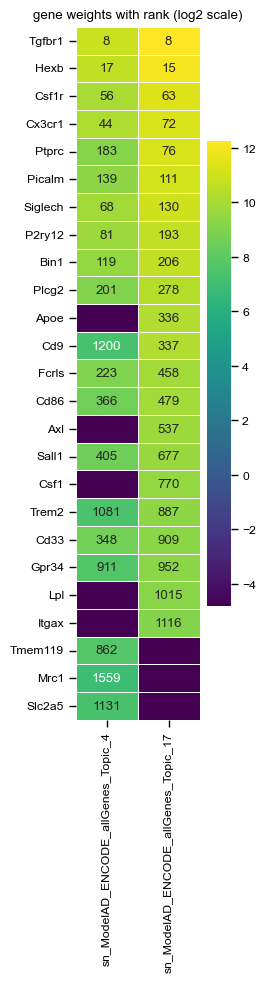

In [21]:
top_model = Topyfic.read_topModel(f"topModel_sn_ModelAD_ENCODE_allGenes.p")
DAM = ['Tgfbr1',
 'Hexb',
 'Csf1r',
 'Cx3cr1',
 'Ptprc',
 'Picalm',
 'Siglech',
 'P2ry12',
 'Bin1',
 'Plcg2',
 'Apoe',
 'Cd9',
 'Fcrls',
 'Cd86',
 'Axl',
 'Sall1',
 'Csf1',
 'Trem2',
 'Cd33',
 'Gpr34',
 'Lpl',
 'Itgax',
 'Tmem119',
 'Mrc1',
 'Slc2a5']
top_model.gene_weight_rank_heatmap(#top_model,
                         topics=['sn_ModelAD_ENCODE_allGenes_Topic_4', 'sn_ModelAD_ENCODE_allGenes_Topic_17'], 
                                   genes=DAM,
                         scale='log2',
                                   figsize=(2, 9),
                                   file_format="pdf",
                                   file_name="figures/gene_weight_rank_heatmap_microglia")

Reading TopModel done!


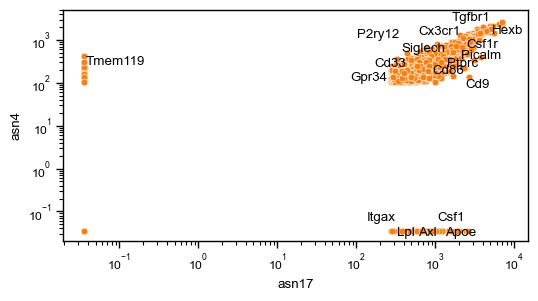

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
from adjustText import adjust_text

top_model = Topyfic.read_topModel(f"topModel_sn_ModelAD_ENCODE_allGenes.p")
gene_weights = top_model.get_gene_weights()

microglia = gene_weights[["sn_ModelAD_ENCODE_allGenes_Topic_4", "sn_ModelAD_ENCODE_allGenes_Topic_17"]]#, "gene_biotype"]]
microglia.columns = ["asn4", "asn17"]#, "gene_biotype"]

DAM = [
 'Apoe',
 'Axl',
 'Cd33',
 'Cd86',
 'Cd9',
 'Csf1',
 'Csf1r',
 'Cx3cr1',
 'Gpr34',
 'Hexb',
 'Itgax',
 'Lpl',
 'P2ry12',
 'Picalm',
 'Ptprc',
 'Siglech',
 'Tgfbr1',
 'Tmem119']
microglia['label'] = ""
microglia.loc[DAM, "label"] = DAM

fig, ax = plt.subplots(figsize=(6, 3))

color_biotypes = ["#2AA02B",
                  "#97665D",
                  "#E279C1",
                  "#FE7F0F",
                  "#976BBE",
                  "#D83737", 
                  "#3281B9"]

biotypes = ['Chromatin Binding',
            'Chromatin Organization',
            'Histone Modifying Enzyme',
            'TAF-Mediator',
            'miRNA host gene',
            'Transcription Factor',
            'Transcription Regulator']

sns.scatterplot(data=microglia, 
                x="asn17", 
                y="asn4",
                color='#FE7F0F',
                #hue="gene_biotype",
                #palette=color_biotypes
               ax=ax)
#plt.legend(title="Gene Biotype", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xscale('log')
plt.yscale('log')
texts = []
for i in range(microglia.shape[0]):
    if microglia.label[i] != "":
        texts.append(plt.text(microglia.iloc[i, 1], 
                 microglia.iloc[i, 0], 
                 microglia.label[i], 
                     #horizontalalignment='left', 
                     #size='medium', 
                     color='black'))
                     #weight='semibold')
adjust_text(texts)
plt.xlim(0, 15000)
plt.ylim(0, 5000)
plt.savefig("figures/figE.pdf") 

## MA plot

Reading TopModel done!


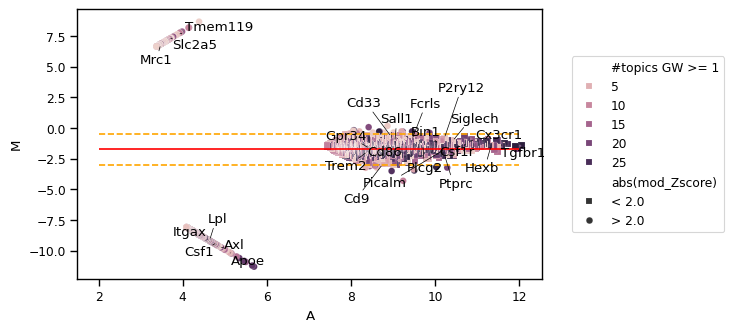

In [4]:
import sys
sys.path.insert(0, '/Users/nargesrezaie/Documents/MortazaviLab/Topyfic')
import scanpy as sc
import Topyfic
import pandas as pd
import matplotlib.pyplot as plt

top_model = Topyfic.read_topModel(f"topModel_sn_ModelAD_ENCODE_allGenes.p")

size = top_model.get_gene_weights().copy(deep=True)
size[size > 1] = 1
size[size< 1] = 0

size = pd.DataFrame(size.sum(axis=1))

DAM = ['Grn', 'Trem2', 'Tyrobp', 'Apoe', 'Lpl', 'Axl', 'Cd9',
       'Cd163', 'Cd14', 'Cd86', 'Mrc1', 'Lst1', 'Ptprc', 'Msr1',
       'Aif1', 'Hla-dra', 'Tmem119', 'Hexb', 'Cx3cr1', 'P2ry12',
       'Csf1r', 'Gpr34', 'Tgfbr1', 'Fcrls', 'Siglech', 'Slc2a5', 
       'Sall1', 'Cst7', 'Itgax', 'Spp1', 'Csf1', 'Ccl6', 'Csf1'
       'Ms4a6a', 'Cd33', 'Bin1', 'Picalm', 'Plcg2']
plt.figure(figsize=(6, 3.5))
gene_zscore = top_model.MA_plot(topic1="sn_ModelAD_ENCODE_allGenes_Topic_4", 
                                topic2="sn_ModelAD_ENCODE_allGenes_Topic_17", 
                                size=size,
                                pseudocount=1, 
                                threshold=2,
                                cutoff=2.0, 
                                labels=DAM,
                                file_name="figures/MA_plot/microglia_4_17")